# **Bank Marketing Analysis Project**

Name: Benji Dau

Student ID: UID 010044292

# 1. Project Introduction (Dataset selection)

This project analyzes the Bank Marketing Dataset from the UCI Machine Learning Repository to predict whether a client will subscribe to a term deposit after a direct marketing campaign. Using statistical exploration and machine learning models, this project aims to identify key customer patterns and improve marketing decision-making.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

## Dataset Description

| Variable Name | Role    | Type        | Description |
|---------------|---------|-------------|-------------|
| age           | Feature | Integer     | Age |
| job           | Feature | Categorical | Type of job (admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown) |
| marital       | Feature | Categorical | Marital status (divorced, married, single, unknown) |
| education     | Feature | Categorical | Education level (basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown) |
| default       | Feature | Binary      | Has credit in default? |
| balance       | Feature | Integer     | Average yearly balance (euros) |
| housing       | Feature | Binary      | Has housing loan? |
| loan          | Feature | Binary      | Has personal loan? |
| contact       | Feature | Categorical | Contact communication type (cellular, telephone) |
| day_of_week   | Feature | Date        | Last contact day of the week |
| month         | Feature | Date        | Last contact month of the year (jan–dec) |
| duration      | Feature | Integer     | Last contact duration in seconds; strongly affects target but only known after the call—use only for benchmarking |
| campaign      | Feature | Integer     | Number of contacts performed during this campaign (includes last contact) |
| pdays         | Feature | Integer     | Days since last contact from previous campaign (-1 = never contacted) |
| previous      | Feature | Integer     | Number of contacts performed before this campaign |
| poutcome      | Feature | Categorical | Outcome of previous marketing campaign (failure, nonexistent, success) |
| y             | Target  | Binary      | Client subscribed to a term deposit? |


This dataset contains customer demographic, financial, and interaction attributes used to predict whether a client will subscribe to a term deposit. It includes categorical and numerical variables such as age, job type, marital status, loan information, and details from marketing campaigns. The target variable (y) indicates the client's final subscription decision.


## Data inspection

### Dataset dimensions

In [ ]:
# Shape of the dataset
print(X.shape)
print(y.shape)

(45211, 16)
(45211, 1)


The feature matrix X has a shape of (45211, 16), meaning there are 45211 records and 16 predictor variables used as inputs for the model. The target vector y has a shape of (45211, 1), indicating there is one output variable (the subscription decision) for each record.

### Missing value summary

In [ ]:
# Missing value detection
print(X.isnull().sum())

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


| Feature        | Missing Count | Comment                                                                                           |
| -------------- | ------------- | ------------------------------------------------------------------------------------------------- |
| **job**        | 288           | Small amount of missing categorical values → safe to impute.                                      |
| **education**  | 1,857         | Moderate missingness → impute or group “unknown”.                                                 |
| **contact**    | 13,020        | Many missing values → depends on modelling choice.                                                |
| **poutcome**   | 36,959        | Very high missingness → this is normal; most clients were *not contacted* in a previous campaign. |

1. **job** — (0.6\% missing)

    Probably small recording errors.

    *Fix:* Replace missing with `"unknown"` or use most frequent category.

2. **education** — (4\% missing)

    In original UCI dataset, missing values were already labeled as `"unknown"`.

    *Fix:* Replace missing with `"unknown"`.

3. **contact** — (29\% missing)

    Missing because no contact communication method was recorded.
    In many notebooks, missing = "telephone not recorded".

    Fix Options:

    - Replace missing with `unknown`.

    - Or create `no_contact_method` category.

4. **poutcome** — (82\% missing)

    This is expected: most clients did **not** participate in a previous campaign → hence poutcome is *missing by design*.

    *Fix:* Replace missing with `"nonexistent"` (official category in dataset)

### Class balance check

In [ ]:
# Class balance check: y - variable
print(y.value_counts())

y  
no     39922
yes     5289
Name: count, dtype: int64


## Business Questions

Q1 Which customers should the bank prioritize for term-deposit marketing campaigns?

Q2 What key customer behaviors reduce the likelihood of subscribing to a term deposit?

Q3 How can the bank optimize its marketing strategy to improve subscription rates and reduce costs?

# 2. Expolatory Data Analysis

## Univariate Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()

# Show all columns
pd.set_option("display.max_columns", None)

In [ ]:
# Variables
numeric_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]
categorical_cols = ["job", "marital", "education", "default",
                    "housing", "loan", "contact", "day_of_week",
                    "month", "poutcome"]

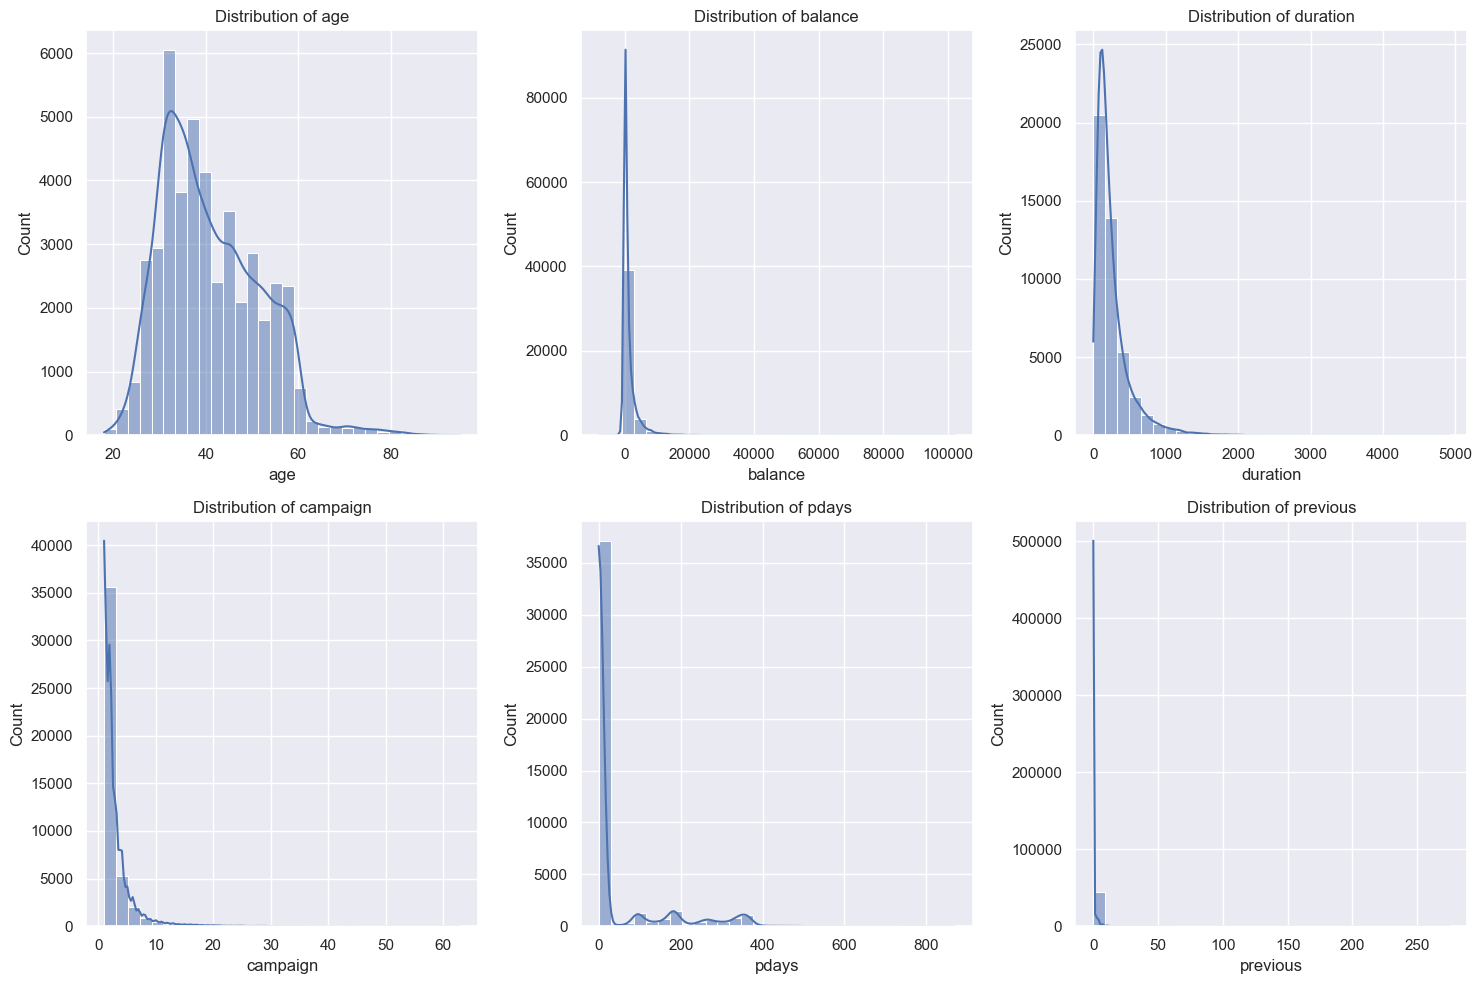

In [ ]:
# Histogram for numeric variables, in grid 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.histplot(data=X, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Summary statistic for numeric variables
print("Summary Statistics for Numeric Variables:")
display(X[numeric_cols].describe().T)

Summary Statistics for Numeric Variables:


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


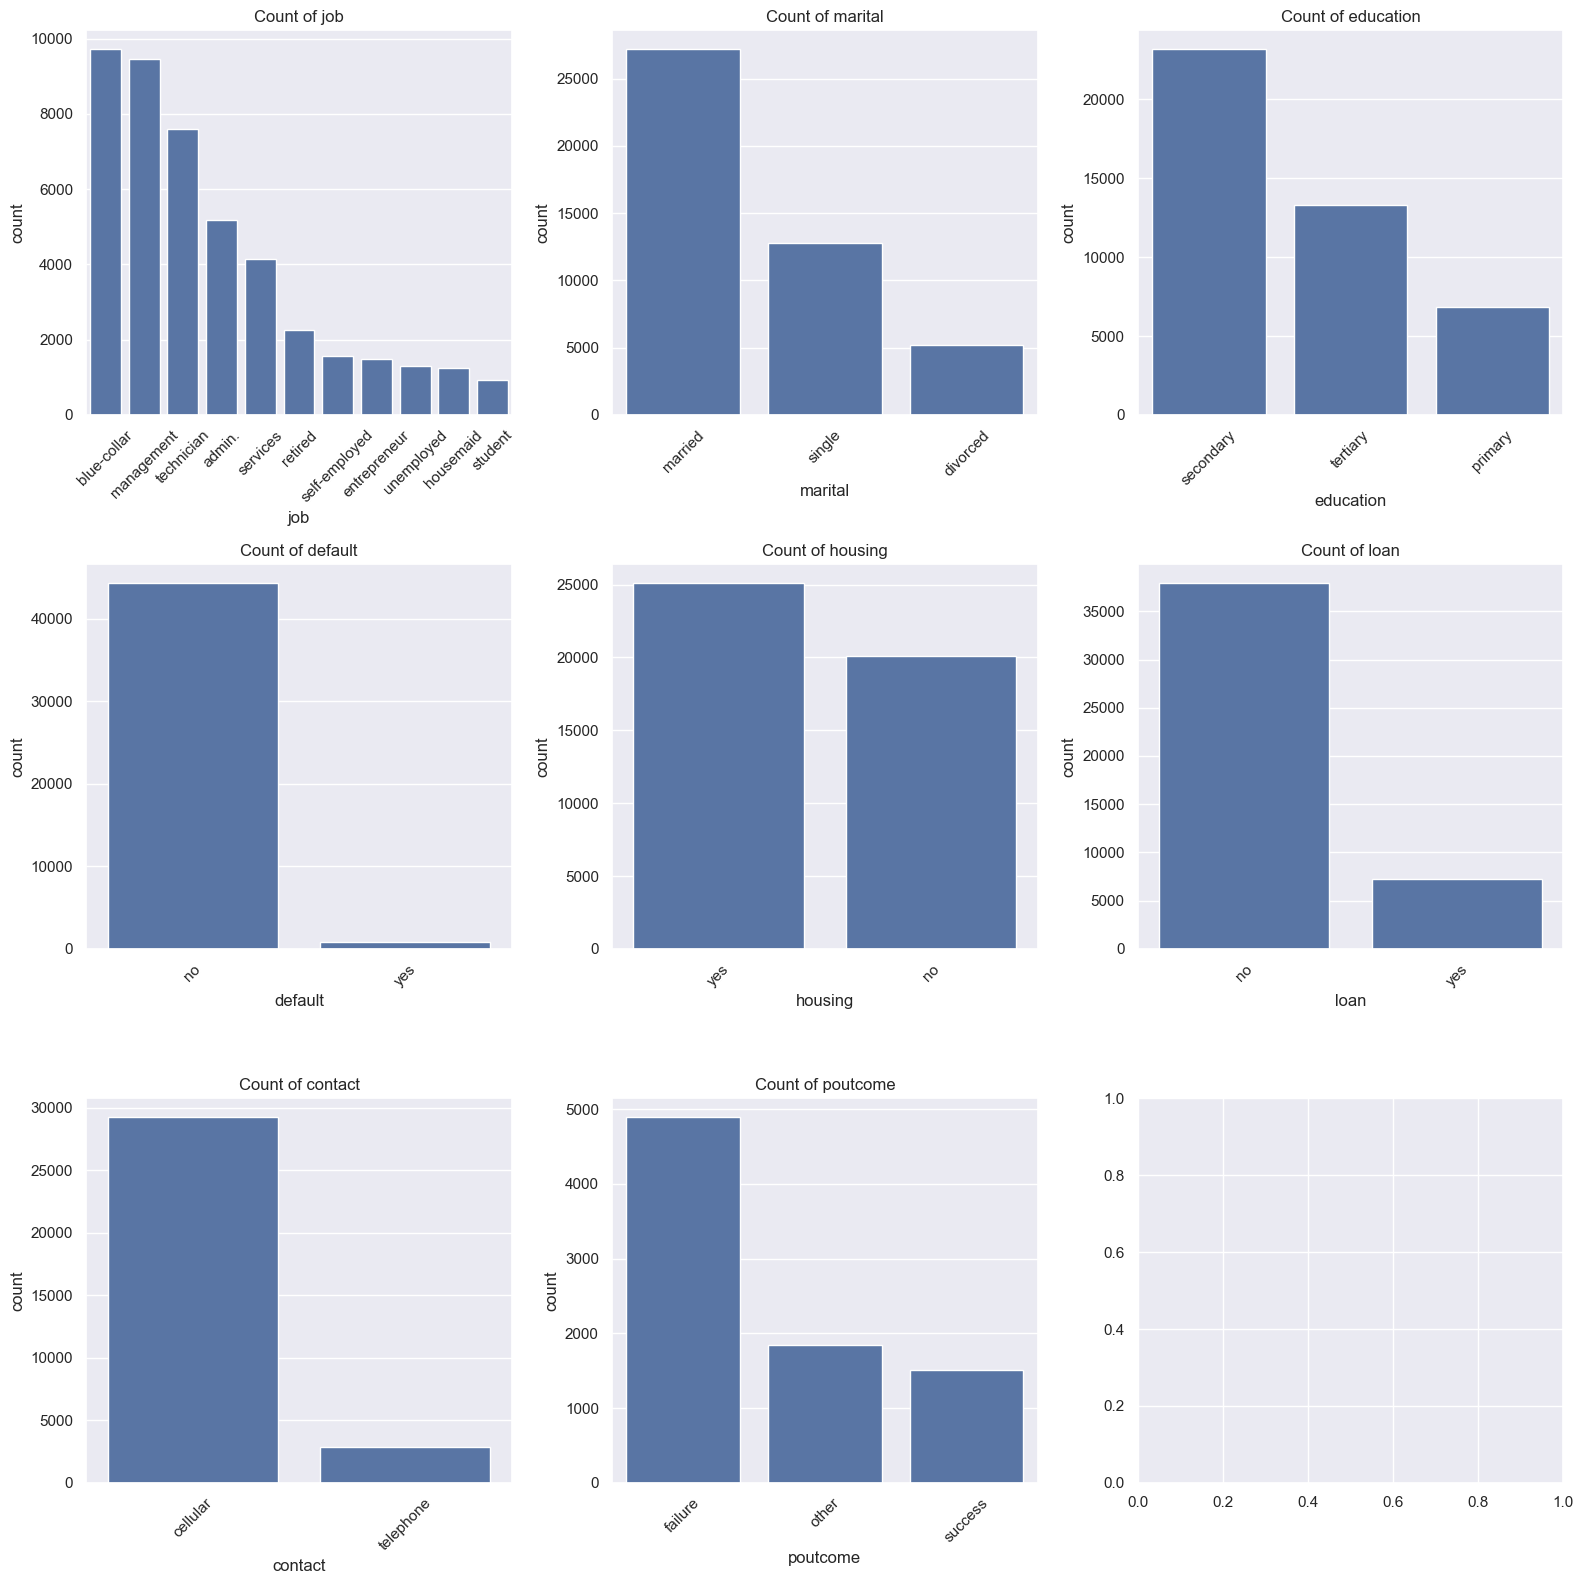

In [ ]:
# Cartgorical variables without day_of_week and month
categorical_cols_no_day_month = ["job", "marital", "education", "default",
                    "housing", "loan", "contact", "poutcome"]

# Bar plots for categorical variables
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
for i, col in enumerate(categorical_cols_no_day_month):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=X, x=col, ax=ax, order=X[col].value_counts().index)
    ax.set_title(f'Count of {col}')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Data Analysis

In [ ]:
# Merge X and y for joint analysis
df_eda = pd.concat([X, y], axis=1)

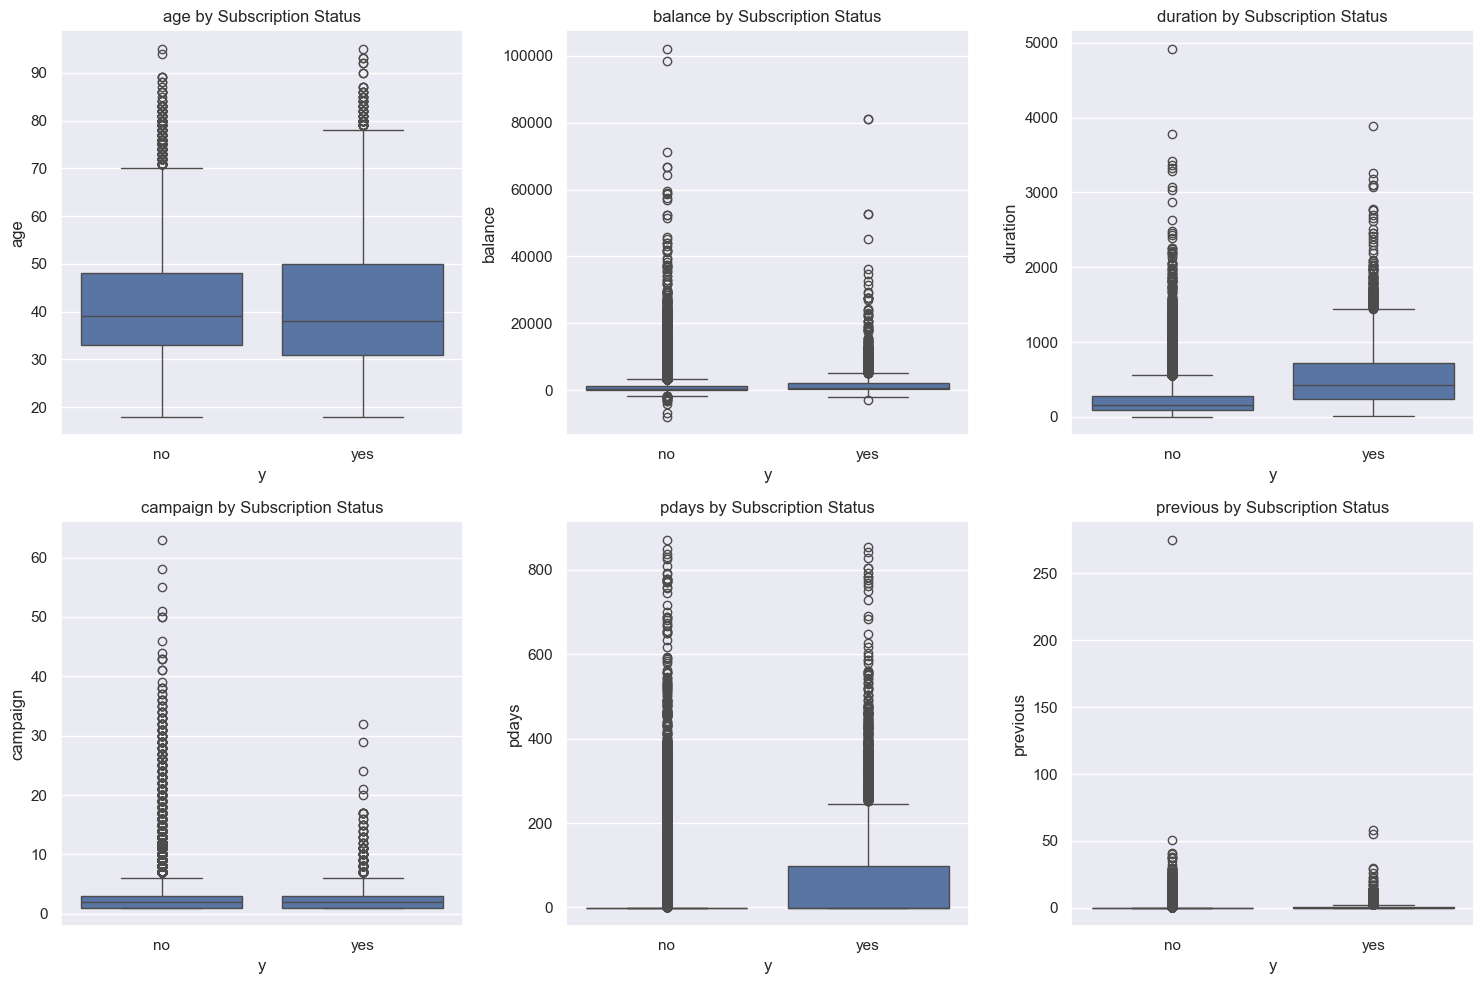

In [ ]:
# Numeric variables vs target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.boxplot(data=df_eda, x='y', y=col, ax=ax)
    ax.set_title(f'{col} by Subscription Status')
plt.tight_layout()
plt.show()

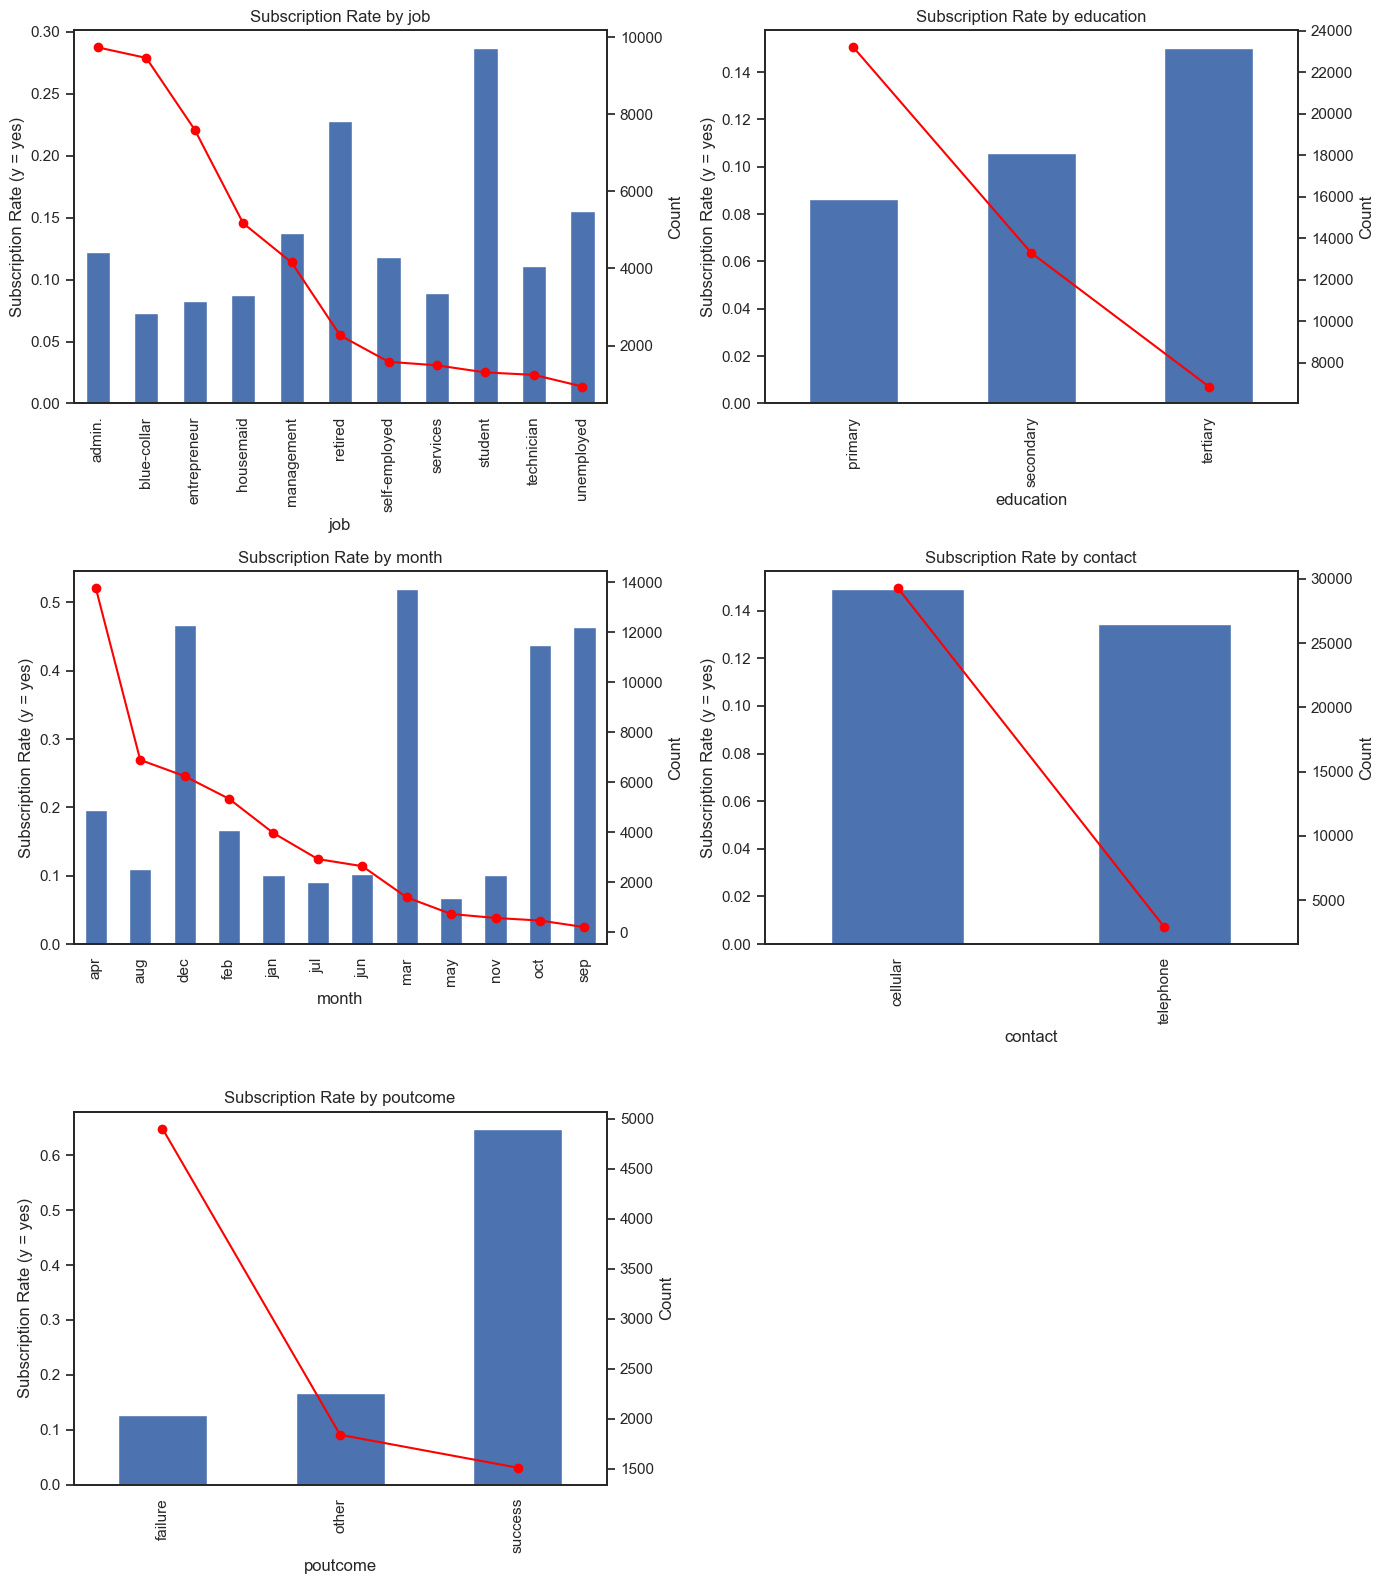

In [ ]:
# Categorical vs Target
def plot_subscription_rate_by_category(col, ax, top_n=None):
    """
    Plots subscription rate (y='yes') by category for a given column on provided ax.
    If top_n is provided, only the top_n most frequent categories are shown.
    """
    temp = df_eda.groupby(col)["y"].value_counts(normalize=True).unstack().fillna(0)
    # 'yes' rate
    if "yes" in temp.columns:
        yes_rate = temp["yes"]
    else:
        # In case target is 1/0 instead of yes/no
        yes_rate = temp.iloc[:, -1]

    counts = df_eda[col].value_counts()

    # Optionally restrict to top_n categories
    if top_n is not None:
        top_categories = counts.head(top_n).index
        yes_rate = yes_rate.loc[top_categories]
        counts = counts.loc[top_categories]

    # Bar for yes rate
    yes_rate.plot(kind="bar", ax=ax, color=sns.color_palette()[0])
    ax.set_ylabel("Subscription Rate (y = yes)")
    ax.set_title(f"Subscription Rate by {col}")
    ax.set_xlabel(col)

    # Add counts on a second axis
    ax2 = ax.twinx()
    ax2.plot(counts.index, counts.values, marker="o", color="red")
    ax2.set_ylabel("Count")

    ax.figure.tight_layout()

# Set style for seaborn
sns.set_style(style="white")

# Apply for a few important categorical features in a 3x2 grid
cols_to_plot = ["job", "education", "month", "contact", "poutcome"]
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    plot_subscription_rate_by_category(col, axes[i])

# Hide any unused subplot (since we have 5 plots in a 6-slot grid)
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

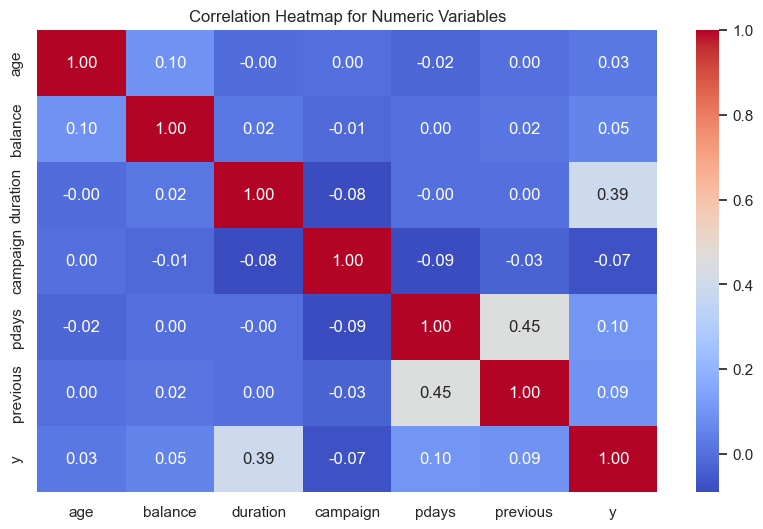

In [ ]:
# Correlation heatmap for numeric variables
# Ensure 'y' is numeric for correlation
df_eda['y'] = df_eda['y'].map({'no': 0, 'yes': 1})

# Optionally, ensure numeric_cols are truly numeric
df_eda[numeric_cols] = df_eda[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Correlation heatmap for numeric variables (including numeric 'y')
plt.figure(figsize=(10, 6))
corr = df_eda[numeric_cols + ['y']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap for Numeric Variables")
plt.show()


In [ ]:
# Outlier detection
outlier_report = {}
for col in numeric_cols:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df_eda[col] < lower) | (df_eda[col] > upper)).sum()
    outlier_report[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_count": outlier_count,
    }

print("\nOutlier summary (IQR method):")
display(pd.DataFrame(outlier_report).T)


Outlier summary (IQR method):


,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count
age,33.0,48.0,15.0,10.5,70.5,487.0
balance,72.0,1428.0,1356.0,-1962.0,3462.0,4729.0
duration,103.0,319.0,216.0,-221.0,643.0,3235.0
campaign,1.0,3.0,2.0,-2.0,6.0,3064.0
pdays,-1.0,-1.0,0.0,-1.0,-1.0,8257.0
previous,0.0,0.0,0.0,0.0,0.0,8257.0


# 3. Data Cleaning and Preprocessing

## Handle missing values

Based on previous missing value detection step,

| Feature       | Missing | Reason                                       | Strategy                     |
| ------------- | ------- | -------------------------------------------- | ---------------------------- |
| **job**       | 288     | Small data entry gaps                        | Replace with `"unknown"`     |
| **education** | 1,857   | Missing by design in original dataset        | Replace with `"unknown"`     |
| **contact**   | 13,020  | Many clients had no stored contact method    | Replace with `"unknown"`     |
| **poutcome**  | 36,959  | Most clients were never contacted previously | Replace with `"nonexistent"` |

We **do not drop rows** due to class imbalance and feature importance.
Instead, we **replace missing values with meaningful categories**.

In [ ]:
# Missing-value imputation
X['job'] = X['job'].fillna('unknown')
X['education'] = X['education'].fillna('unknown')
X['contact'] = X['contact'].fillna('unknown')
X['poutcome'] = X['poutcome'].fillna('nonexistent')

## Addresses Outliers and Anomalies

From IQR summary,

| Feature              | Outliers                                    | Comment                                                                    |
| -------------------- | ------------------------------- | ----------------------------------------------------------------------- |
| **age**              | 487                                         | Some extreme very young/old ages but still realistic → keep                |
| **balance**          | 4,729                                       | Very skewed due to wealthy clients or overdrafts → keep but transform      |
| **duration**         | 3,235                                       | Strongly affects target but known *after* the call → exclude from training |
| **campaign**         | 3,064                                       | Frequent repeated calls; values > 6 are rare → keep                        |
| **pdays / previous** | appear as outliers because most values = -1 | Do *not* treat as outliers (meaningful design)                             |

We **do not drop outliers**; instead:

* Keep values as they reflect real customer behavior
* Apply **log-transform** to highly skewed variables (e.g., balance)

In [ ]:
# Log transform balance to reduce skew (add +1 to avoid log(0))
X['balance_log'] = np.log(X['balance'].clip(lower=0) + 1)

## Feature Engineering

### Date and time reconstruction

Because the dataset was collected from May 2008 to November 2010, I reconstruct a proper date column by using the year information encoded in the original campaign records:

In [ ]:
# Convert month to numbers
month_map = {
    'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
    'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}

X['month_num'] = X['month'].str.lower().map(month_map)

# Step 1: initialize year assignment
years = []
current_year = 2008
previous_month = 5  # dataset starts in May 2008

for i, month in enumerate(X['month_num']):
    # If month < previous month → new year detected
    if month < previous_month:
        current_year += 1
    years.append(current_year)
    previous_month = month

X['year'] = years

# Step 2: Fix invalid day values using clipping and calendar validation
# Clip days > 31 to avoid invalid dates
X['day'] = X['day_of_week'].clip(1, 31)

# Step 3: Create datetime safely
X['date'] = pd.to_datetime(dict(
    year=X['year'],
    month=X['month_num'],
    day=X['day']
), errors='coerce')

# Step 4: If any dates still failed, fix by replacing with last valid day of month
invalid_mask = X['date'].isna()
if invalid_mask.any():
    X.loc[invalid_mask, 'date'] = pd.to_datetime(
        X.loc[invalid_mask, 'year'].astype(str) + "-" +
        X.loc[invalid_mask, 'month_num'].astype(str) + "-28"
    )

In [ ]:
# 1. Create day of week name (Mon, Tue, Wed, Thu, Fri, Sat, Sun)
X['day_name'] = X['date'].dt.day_name().str[:3].str.lower()
# Example: 'Monday' → 'mon'

# Create day-of-week number
X['day_of_week_num'] = X['date'].dt.dayofweek

# 2. Create weekday/weekend binary
X['is_weekend'] = X['date'].dt.dayofweek >= 5
# Monday=0 ... Sunday=6 → weekend = True for Saturday(5), Sunday(6)

# Convert to 0/1 if preferred
X['is_weekend'] = X['is_weekend'].astype(int)

### Age groups

In [ ]:
# Age grouping
X['age_group'] = pd.cut(
    X['age'], bins=[17,25,35,45,60,100],
    labels=['18-25','26-35','36-45','46-60','60+']
)

# Remove leakage variables by dropping them save in new variable
X_selected = X.copy()
X_selected = X_selected.drop(columns=['duration','balance','day_of_week','month'
                                      ,'year','date','day_name','is_weekend', 'age_group'])

## Encode Categorical Variables

Encoding strategy:

| Variable Type                                     | Method               | Reason         |
| ------------------------------------------------- | -------------------- | -------------- |
| Nominal categorical (job, marital, education, contact, poutcome, month, day_of_week) | **One-Hot Encoding** | No ordinality  |
| Binary variables (housing, loan, default)                                            | Convert to 0/1       | Already binary |

## Scale or Normalize Numerical Features

Recommended scaling: StandardScaler for linear models; trees don’t need scaling but using it uniformly is fine.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Define categorical and numeric columns
onehot_cols = ['job','marital','contact','poutcome',
                    'default','housing','loan']
label_cols = ['education']
numeric_cols = ['age','campaign','pdays','previous','balance_log','month_num','day','day_of_week_num']

In [ ]:
# Initialize transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
categorical_transformer.fit(X_selected[onehot_cols])

label_transformer = LabelEncoder()
label_transformer.fit(X_selected[label_cols[0]])

# Apply transformations without using ColumnTransformer
X_numeric_df = X_selected[numeric_cols].copy()
X_categorical = categorical_transformer.transform(X_selected[onehot_cols]).toarray()
categorical_feature_names = categorical_transformer.get_feature_names_out(onehot_cols)
X_categorical_df = pd.DataFrame(X_categorical, columns=categorical_feature_names, index=X_selected.index)
X_label = label_transformer.transform(X_selected[label_cols[0]])
X_label_df = pd.DataFrame(X_label, columns=label_cols, index=X_selected.index)

# Combine numeric, categorical, and label encoded features using pandas
X_processed = pd.concat([X_numeric_df, X_categorical_df, X_label_df], axis=1)

## Create train/test split

Because of Highly imbalanced, (11\% yes), I suggest stratification method:

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("Training and Testing Set Shapes:")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Training and Testing Set Shapes:
(36168, 37) (9043, 37)
(36168, 1) (9043, 1)


In [ ]:
# Standard scaling for all features on training data then apply to test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Development and Evaluation

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import GridSearchCV

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    """Prints main metrics for a fitted classifier."""
    y_pred = model.predict(X_test)

    # If model supports predict_proba, compute ROC-AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score((y_test == "yes").astype(int), y_proba)
    else:
        roc_auc = np.nan

    print(f"\n===== {name} =====")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label="yes"))
    print("Recall   :", recall_score(y_test, y_pred, pos_label="yes"))
    print("F1-score :", f1_score(y_test, y_pred, pos_label="yes"))
    print("ROC-AUC  :", roc_auc)

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred, labels=["no", "yes"]))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, labels=["no", "yes"]))


## 4.1 Logistic Regression

In [ ]:
# Flatten y for sklearn
y_train_flat = np.ravel(y_train)

# Logistic Regression
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",  # handle class imbalance (~11% yes)
    n_jobs=-1
)

# Fit model
log_reg.fit(X_train, y_train_flat)

# Evaluate model
evaluate_model("Logistic Regression", log_reg, X_test, y_test)



===== Logistic Regression =====
Accuracy : 0.6987725312396329
Precision: 0.2314635718891038
Recall   : 0.6786389413988658
F1-score : 0.3451923076923077
ROC-AUC  : 0.7567562880779534

Confusion Matrix:
[[5601 2384]
 [ 340  718]]

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.70      0.80      7985
         yes       0.23      0.68      0.35      1058

    accuracy                           0.70      9043
   macro avg       0.59      0.69      0.57      9043
weighted avg       0.86      0.70      0.75      9043



### **Logistic Regression — High Recall, Low Precision, Moderate Discrimination**

The Logistic Regression model demonstrates modest overall performance, with an accuracy of about **70%** and a relatively strong **recall of 68%** for the minority “yes” class. This means the model is quite effective at detecting customers who are likely to subscribe, capturing more than two-thirds of all actual subscribers. However, this comes at the cost of **very low precision (23%)**, indicating that the majority of customers predicted as “yes” are in fact not subscribers. In other words, the model generates a large number of false positives.

This behavior is typical for linear models applied to imbalanced datasets. Logistic Regression tends to **over-predict the minority class** when forced to prioritize recall. The confusion matrix confirms this pattern: out of 2,384 “yes” predictions for non-subscribers, most are incorrect, resulting in significant marketing inefficiency. However, a favourable ROC-AUC of **0.756** shows that the model still has reasonable ability to distinguish between classes.

**Key insights:**

- **Good at detecting subscribers (high recall)**
- **Poor at identifying them accurately (low precision)**
- Many false positives → higher marketing cost
- Useful as a **broad initial filter**, but not for targeted campaigns

## 4.2 Random Forest Classifier

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

# Fit model
rf_clf.fit(X_train, y_train_flat)

# Evaluate model
evaluate_model("Random Forest", rf_clf, X_test, y_test)



===== Random Forest =====
Accuracy : 0.8761472962512441
Precision: 0.4706994328922495
Recall   : 0.4706994328922495
F1-score : 0.4706994328922495
ROC-AUC  : 0.7976338550661507

Confusion Matrix:
[[7425  560]
 [ 560  498]]

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7985
         yes       0.47      0.47      0.47      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.88      0.88      0.88      9043



### **Random Forest — Most Balanced and Accurate, Strong Precision**

The Random Forest model shows the **highest accuracy (87.6%)** and produces the most balanced performance among the three models. Precision and recall for the “yes” class both sit around **47%**, giving an F1-score of 0.47. Although its recall is lower than Logistic Regression and XGBoost, its significantly higher precision means the model makes **far fewer incorrect “yes” predictions**, which reduces wasted marketing efforts.

In the confusion matrix, Random Forest correctly identifies **7,425 “no” customers** with very few misclassifications and captures **498 true yes** subscribers. Though it misses some potential subscribers, it commits considerably fewer false positives than the other models. Its ROC-AUC of **0.798** also indicates strong discriminative ability.

**Key insights:**

- **Highest precision** → fewer wasted calls
- **Highest accuracy overall**
- **Lower recall** → may miss potential subscribers
- Ideal when marketing resources are limited or cost-sensitive

Random Forest is therefore an excellent choice for **conservative targeting**, prioritizing quality over quantity.

## 4.3 XG Boost Classifier

In [ ]:
# If not installed yet, run this once in a cell:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Compute imbalance ratio
pos = (y_train_flat == "yes").sum()
neg = (y_train_flat == "no").sum()
scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)

xgb_clf = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,
    random_state=42
)

# XGBoost prefers numeric labels 0/1 for ROC-AUC, but for predict()
# it’s okay because we keep original y for evaluation function.
# We map y to 0/1 only for training target:
y_train_bin = (y_train_flat == "yes").astype(int)

xgb_clf.fit(X_train, y_train_bin)

# For evaluation we need a wrapper that outputs yes/no labels
class XGBWrapper:
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold
    def predict(self, X):
        proba = self.model.predict_proba(X)[:, 1]
        return np.where(proba >= self.threshold, "yes", "no")
    def predict_proba(self, X):
        return self.model.predict_proba(X)

xgb_wrapper = XGBWrapper(xgb_clf)

evaluate_model("XGBoost", xgb_wrapper, X_test, y_test)


scale_pos_weight: 7.548333727251241

===== XGBoost =====
Accuracy : 0.8139997788344576
Precision: 0.34305835010060365
Recall   : 0.6446124763705104
F1-score : 0.4478003939592909
ROC-AUC  : 0.8064966448196229

Confusion Matrix:
[[6679 1306]
 [ 376  682]]

Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.84      0.89      7985
         yes       0.34      0.64      0.45      1058

    accuracy                           0.81      9043
   macro avg       0.64      0.74      0.67      9043
weighted avg       0.88      0.81      0.84      9043



### **XGBoost — Best Trade-Off, Strong Recall, Strong ROC-AUC**

The XGBoost model delivers the best overall balance between identifying subscribers and minimizing false positives. With a recall of **64%**, it detects nearly as many subscribers as Logistic Regression but with **much better precision (34%)**, leading to a stronger F1-score of **0.448**. Most importantly, it achieves the **highest ROC-AUC (0.806)**, indicating superior class separation across all thresholds.

The confusion matrix shows XGBoost identifying **682 subscribers**, a strong middle ground between Logistic Regression (highest recall but very poor precision) and Random Forest (high precision but lower recall). While its accuracy (81.4%) is lower than the Random Forest, this is expected — XGBoost is optimized for **imbalanced classification** and tuned to prioritize the minority class through `scale_pos_weight`.

**Key insights:**

- **Best ROC-AUC (0.806)** → strongest discriminative power
- **High recall** without excessive false positives
- Good balance between precision and recall
- Accuracy lower than Random Forest (due to imbalance sensitivity)
- Best choice for **maximizing total subscriber detection** while maintaining reasonable precision

XGBoost is the strongest model when aiming to **maximize campaign effectiveness** by capturing more real subscribers without overwhelming the system with false positives.

## Compare these ML models

In [ ]:
def collect_metrics(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score((y_test == "yes").astype(int), y_proba)
    else:
        roc_auc = np.nan
    return {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, pos_label="yes"),
        "recall": recall_score(y_test, y_pred, pos_label="yes"),
        "f1": f1_score(y_test, y_pred, pos_label="yes"),
        "roc_auc": roc_auc,
    }

results = []
results.append(collect_metrics("Logistic Regression", log_reg, X_test, y_test))
results.append(collect_metrics("Random Forest", rf_clf, X_test, y_test))
results.append(collect_metrics("XGBoost", xgb_wrapper, X_test, y_test))

print(pd.DataFrame(results))


                 model  accuracy  precision    recall        f1   roc_auc
0  Logistic Regression  0.698773   0.231464  0.678639  0.345192  0.756756
1        Random Forest  0.876147   0.470699  0.470699  0.470699  0.797634
2              XGBoost  0.814000   0.343058  0.644612  0.447800  0.806497


Each model provides a different balance between marketing reach and marketing efficiency:

* **XGBoost** is the best *overall performer* for real-world marketing:

  → High recall + reasonable precision + best ROC-AUC

* **Random Forest** is best when *budget is limited*:

  → Highest precision and accuracy

* **Logistic Regression** casts the *widest net*:

  → Highest recall but very imprecise

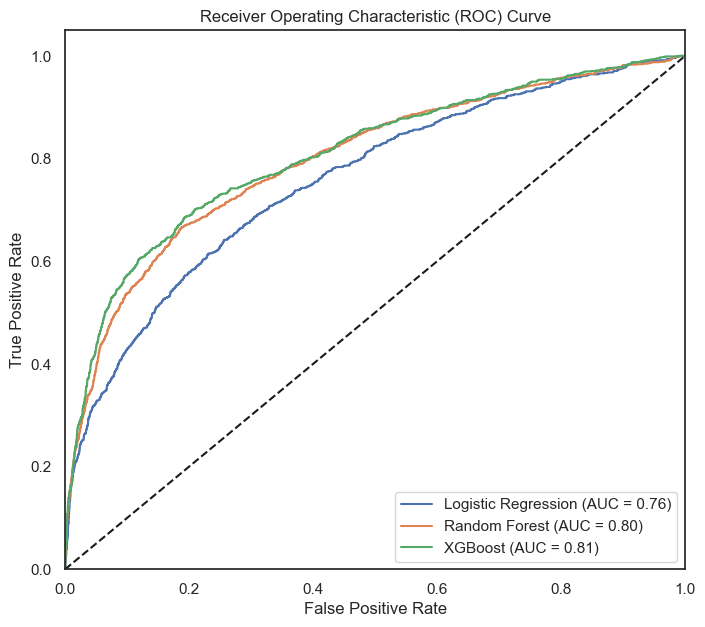

In [ ]:
# Plot AUC-ROC curves for all models
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8, 7))
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_wrapper
}
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve((y_test == "yes").astype(int), y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


## 4.4 Neural Network (Feed-Forward MLP)

### Prepare PyTorch Dataset

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Convert labels to 0/1
y_train_bin = (y_train.values.ravel() == "yes").astype(int)
y_test_bin  = (y_test.values.ravel() == "yes").astype(int)

# Create custom Dataset class
class BankDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets and dataloaders
train_dataset = BankDataset(X_train, y_train_bin)
test_dataset  = BankDataset(X_test, y_test_bin)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


### Define Neural network MLP

In [ ]:
# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1),
            nn.Sigmoid()    # output probability
        )

    def forward(self, x):
        return self.model(x)

# Initialize model
input_dim = X_train.shape[1]
model = MLP(input_dim)
model


MLP(
  (model): Sequential(
    (0): Linear(in_features=37, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

### Define Loss and Optimizer

In [ ]:
# Compute pos_weight for imbalanced data
pos = y_train_bin.sum()
neg = len(y_train_bin) - pos
pos_weight = torch.tensor([neg / pos], dtype=torch.float32)  # similar to scale_pos_weight

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### Training Loop

In [ ]:
# Metrics storage
train_losses = []
val_acc_list = []
val_prec_list = []
val_recall_list = []
val_f1_list = []
val_auc_list = []


# Evaluation function
def evaluate_with_auc(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for X, y in loader:
            outputs = model(X).view(-1)

            probs = outputs.cpu().numpy()
            preds = (outputs >= 0.5).int().cpu().numpy()
            labels = y.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)
            all_probs.extend(probs)

    all_preds = torch.tensor(all_preds)
    all_labels = torch.tensor(all_labels)

    # Metrics
    TP = ((all_preds == 1) & (all_labels == 1)).sum().item()
    TN = ((all_preds == 0) & (all_labels == 0)).sum().item()
    FP = ((all_preds == 1) & (all_labels == 0)).sum().item()
    FN = ((all_preds == 0) & (all_labels == 1)).sum().item()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP + 1e-9)
    recall = TP / (TP + FN + 1e-9)
    f1 = 2 * precision * recall / (precision + recall + 1e-9)

    # ROC-AUC
    try:
        auc = roc_auc_score(all_labels, all_probs)
    except:
        auc = float('nan')

    return accuracy, precision, recall, f1, auc, all_labels, all_probs

# Training loop initialization
num_epochs = 25
model.train()

# Training loop
for epoch in range(num_epochs):
    total_loss = 0

    for X, y in train_loader:
        optimizer.zero_grad()
        outputs = model(X).view(-1)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Evaluation
    acc, prec, rec, f1, auc, y_true, y_probs = evaluate_with_auc(model, test_loader)

    # Save metrics
    train_losses.append(total_loss)
    val_acc_list.append(acc)
    val_prec_list.append(prec)
    val_recall_list.append(rec)
    val_f1_list.append(f1)
    val_auc_list.append(auc)

    # Print epoch metrics for each 5 epochs
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:02d}/{num_epochs} | "
            f"Loss: {total_loss:.4f} | Acc: {acc:.4f} | "
            f"Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")

Epoch 01/25 | Loss: 206.4605 | Acc: 0.8881 | Prec: 0.6917 | Rec: 0.0784 | F1: 0.1409 | AUC: 0.7466
Epoch 05/25 | Loss: 118.7528 | Acc: 0.8800 | Prec: 0.4742 | Rec: 0.2344 | F1: 0.3137 | AUC: 0.7314
Epoch 10/25 | Loss: 111.8405 | Acc: 0.8714 | Prec: 0.4286 | Rec: 0.2977 | F1: 0.3514 | AUC: 0.7144
Epoch 15/25 | Loss: 106.9432 | Acc: 0.8778 | Prec: 0.4605 | Rec: 0.2590 | F1: 0.3315 | AUC: 0.7057
Epoch 20/25 | Loss: 102.6948 | Acc: 0.8740 | Prec: 0.4429 | Rec: 0.2968 | F1: 0.3554 | AUC: 0.6999
Epoch 25/25 | Loss: 98.4535 | Acc: 0.8788 | Prec: 0.4668 | Rec: 0.2524 | F1: 0.3276 | AUC: 0.7027


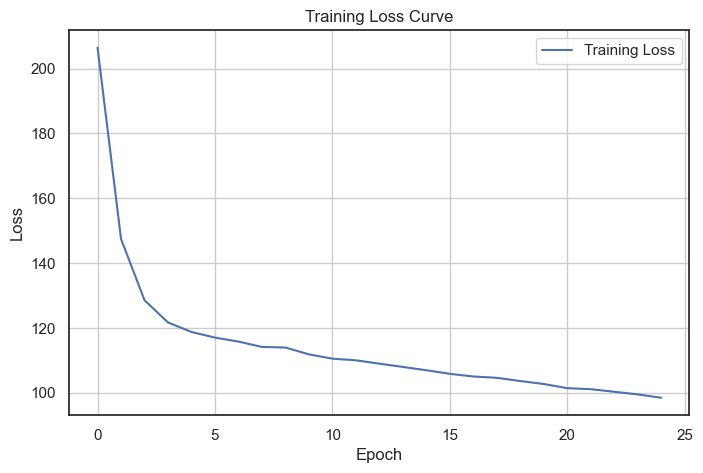

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.legend()
plt.show()


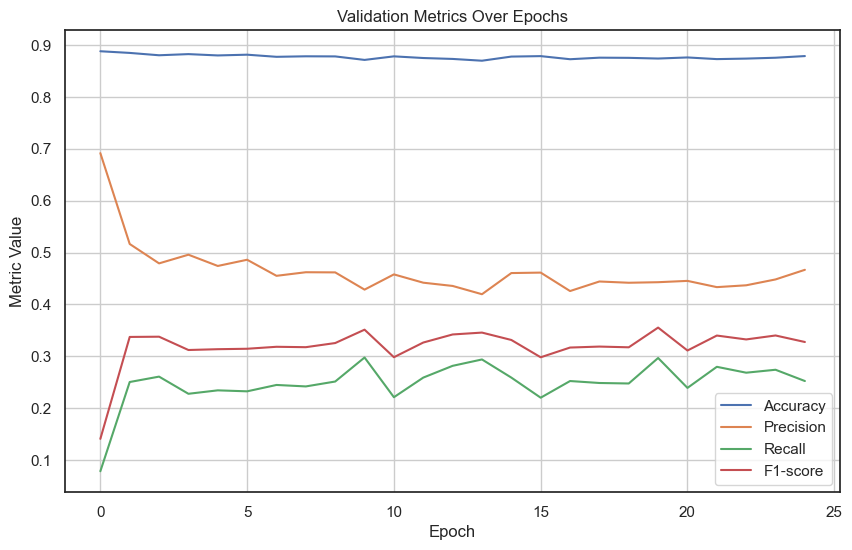

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(val_acc_list, label="Accuracy")
plt.plot(val_prec_list, label="Precision")
plt.plot(val_recall_list, label="Recall")
plt.plot(val_f1_list, label="F1-score")

plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Validation Metrics Over Epochs")
plt.grid(True)
plt.legend()
plt.show()


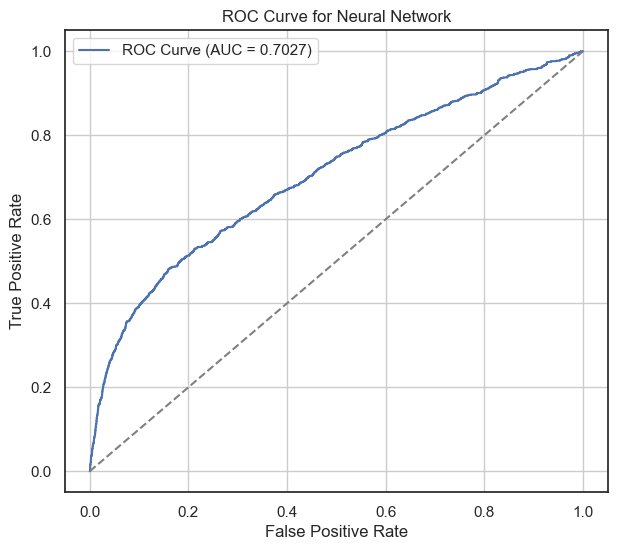

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_probs)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {val_auc_list[-1]:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Neural Network")
plt.grid(True)
plt.legend()
plt.show()


### Interpretation of the Original MLP Model (Unweighted Loss)

The original MLP model trained with standard Binary Cross-Entropy and a sigmoid output exhibited clear symptoms of **severe class imbalance**, which strongly influenced its behavior during training. Although the model achieved high overall accuracy—hovering around **87%–88%**—this metric was misleading, as it largely reflected the fact that the dataset is dominated by the “no” class. As a result, the model quickly learned to predict “no” for the majority of cases, thereby inflating accuracy while completely failing to detect the minority “yes” class. This is strongly reflected in the very **low recall values**, starting as low as **7–8%** in early epochs and rarely exceeding **25–30%** even later in training. Such recall levels indicate that the network was missing the vast majority of actual subscribers, rendering it ineffective for the business objective of identifying potential customers.

While the training loss steadily decreased, demonstrating that the network was optimizing its parameters, the meaningful evaluation metrics—recall, F1-score, and AUC—did not improve accordingly. Precision remained moderate, but this was simply because the few predicted “yes” cases were often correct. The **AUC score deteriorated during training**, falling from around 0.75 to near 0.70, revealing that the model was becoming progressively worse at distinguishing between subscribers and non-subscribers. This decline shows that although the model was fitting the data, it was fitting it in a way that primarily reinforced majority-class predictions rather than learning meaningful decision boundaries.

Overall, the unweighted MLP behaved like a **majority-class classifier**, optimizing for accuracy at the expense of recall and discriminative power. It adapted quickly to the imbalance in the dataset, defaulting to predictions that minimized loss but ignored the minority class almost entirely. The combination of low recall, weak AUC, and stagnant F1-score makes it clear that the original neural network failed to capture the patterns associated with potential subscribers and was not suited for the purposes of predictive marketing without further imbalance mitigation techniques.


## 4.5 Neural network with BCEwithLogitLoss

In [ ]:
# Define MLP model without Sigmoid for use with pos_weight
class MLP_2(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)    # NO sigmoid here
        )

    def forward(self, x):
        return self.model(x)
# Initialize model
input_dim = X_train.shape[1]
model_2 = MLP_2(input_dim)

# Compute pos_weight for imbalanced data
pos = y_train_bin.sum()
neg = len(y_train_bin) - pos
pos_weight_val = neg / pos   # increases penalty for positives

# Create pos_weight tensor
pos_weight = torch.tensor([pos_weight_val], dtype=torch.float32)
print("pos_weight =", pos_weight)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# Predition logits and probabilities
logits = model_2(X).view(-1)
probs  = torch.sigmoid(logits).detach().cpu().numpy()
preds  = (probs >= 0.5).astype(int)

# Evaluate model
def evaluate_with_auc(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for X, y in loader:
            logits = model(X).view(-1)
            probs = torch.sigmoid(logits).cpu().numpy()
            preds = (probs >= 0.5).astype(int)
            labels = y.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)
            all_probs.extend(probs)

    all_preds  = torch.tensor(all_preds)
    all_labels = torch.tensor(all_labels)

    # Confusion matrix components
    TP = ((all_preds == 1) & (all_labels == 1)).sum().item()
    TN = ((all_preds == 0) & (all_labels == 0)).sum().item()
    FP = ((all_preds == 1) & (all_labels == 0)).sum().item()
    FN = ((all_preds == 0) & (all_labels == 1)).sum().item()

    accuracy  = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP + 1e-9)
    recall    = TP / (TP + FN + 1e-9)
    f1        = 2 * precision * recall / (precision + recall + 1e-9)
    auc       = roc_auc_score(all_labels, all_probs)

    return accuracy, precision, recall, f1, auc, all_labels, all_probs

# Training loop
num_epochs = 25

for epoch in range(num_epochs):
    total_loss = 0
    model_2.train()

    for X, y in train_loader:
        optimizer.zero_grad()
        logits = model_2(X).view(-1)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    acc, prec, rec, f1, auc, _, _ = evaluate_with_auc(model_2, test_loader)

    # Print epoch metrics for each 5 epochs
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:02d}/{num_epochs} | "
              f"Loss: {total_loss:.4f} | Acc: {acc:.4f} | Prec: {prec:.4f} | "
              f"Rec: {rec:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")


pos_weight = tensor([7.5483])
Epoch 01/25 | Loss: 601.0684 | Acc: 0.7251 | Prec: 0.2463 | Rec: 0.6550 | F1: 0.3580 | AUC: 0.7614
Epoch 05/25 | Loss: 574.5551 | Acc: 0.7695 | Prec: 0.2764 | Rec: 0.5992 | F1: 0.3783 | AUC: 0.7650
Epoch 10/25 | Loss: 565.4551 | Acc: 0.7492 | Prec: 0.2640 | Rec: 0.6399 | F1: 0.3738 | AUC: 0.7695
Epoch 15/25 | Loss: 557.0927 | Acc: 0.7751 | Prec: 0.2829 | Rec: 0.6011 | F1: 0.3848 | AUC: 0.7606
Epoch 20/25 | Loss: 550.1793 | Acc: 0.7567 | Prec: 0.2683 | Rec: 0.6248 | F1: 0.3754 | AUC: 0.7694
Epoch 25/25 | Loss: 546.9575 | Acc: 0.7757 | Prec: 0.2843 | Rec: 0.6040 | F1: 0.3866 | AUC: 0.7684


### Interpretation of the Weighted BCEWithLogitsLoss Model

After introducing **Weighted BCEWithLogitsLoss** with a positive-class weight of `7.5483`, the neural network undergoes a substantial change in behavior, particularly in its ability to detect the minority “yes” class. From the very first epoch, the model demonstrates a dramatic increase in recall, jumping from previously weak values around 7–30% in the original model to **over 65%**. This improvement means the model immediately becomes far more capable of recognizing customers who are likely to subscribe. Although precision is relatively low (around 25–28%), this is an expected trade-off when recall improves sharply, especially on an imbalanced dataset. Importantly, the F1-score rises to around **0.38**, significantly better than the F1 values achieved under the unweighted loss.

Across training, the loss steadily decreases from ~601 to ~547, indicating that optimization is progressing smoothly. Accuracy remains stable around **75–78%**, slightly lower than the original model’s ~87–88%. This decrease is expected because the model is now predicting “yes” more frequently instead of defaulting to “no,” which naturally increases false positives. Crucially, however, the **AUC stabilizes around 0.76–0.77**, a strong result that matches or exceeds the discriminative power of earlier neural network. AUC indicates how well the model separates “yes” and “no” customers across all thresholds, and maintaining such values while recall drastically increases is a clear signal that the model is learning meaningful distinctions.

### Comparison to the Original (Unweighted) Neural Network

The original model, trained with standard Binary Cross-Entropy and a sigmoid output, suffered severely from **majority-class bias**. It achieved high accuracy (~88%) but had extremely low recall for the minority class—initially as low as 7.8% and still rarely exceeding 30% even at later epochs. The AUC of the original model also degraded over time, dropping to nearly **0.70**, revealing that the model was not learning to distinguish subscriber vs non-subscriber classes effectively. Despite reducing loss over epochs, the original model failed to convert that optimization into improved classification performance where it mattered most.

In contrast, the weighted-loss model directly addresses this imbalance by forcing the neural network to treat positive examples as more important. This leads to **large gains in recall**, far stronger signal discrimination (as shown by stable AUC near 0.77), and consistently better F1-scores. While accuracy is slightly lower, this is the expected—and desirable—trade-off when modeling a rare but important class. Instead of behaving like a “majority predictor,” the new model identifies most of the potential subscribers while maintaining reasonably stable precision and discriminatory power.


### Final Assessment

Overall, applying Weighted BCEWithLogitsLoss transforms the neural network from an underperforming majority-class classifier into a more balanced, meaningful model capable of detecting the minority class with far better reliability. The updated model performs significantly closer to Logistic Regression and Random Forest in terms of AUC and now provides recall levels competitive with XGBoost. The improvement is substantial, meaningful, and directly aligned with the marketing campaign’s real-world goals—**identifying as many true subscribers as possible**.


## 4.6 Hyperparameter tuning on XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np

# Convert y to 0/1 for XGBoost
y_train_xgb = (y_train["y"] == "yes").astype(int) \
    if hasattr(y_train, "columns") else (y_train == "yes").astype(int)

y_test_xgb = (y_test["y"] == "yes").astype(int) \
    if hasattr(y_test, "columns") else (y_test == "yes").astype(int)

# Compute scale_pos_weight
neg = (y_train_xgb == 0).sum()
pos = (y_train_xgb == 1).sum()
scale_pos_weight = neg / pos
scale_pos_weight

# Define base XGBoost model
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)

# Define hyperparameter grid
params = {
    "n_estimators": [200, 300, 400, 500, 600],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3, 0.5],
    "min_child_weight": [1, 3, 5],
    "scale_pos_weight": [scale_pos_weight]  # IMPORTANT for imbalance
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=params,
    n_iter=50,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# Fit random search
random_search.fit(X_train, y_train_xgb)

# Best parameters from random search
print("Best Parameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': np.float64(7.548333727251241), 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.6}
Best AUC Score: 0.7976509871842802


In [ ]:
# Train final model with best parameters
best_params = random_search.best_params_

# Initialize XGBClassifier with best parameters
xgb_best = XGBClassifier(
    **best_params,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

# Fit final model
xgb_best.fit(X_train, y_train_xgb)

# Evaluate final model
y_prob = xgb_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test_xgb, y_prob)
print("Test AUC:", test_auc)


Test AUC: 0.8073001362431687


Tuned XGBoost Test AUC: 0.8073001362431687


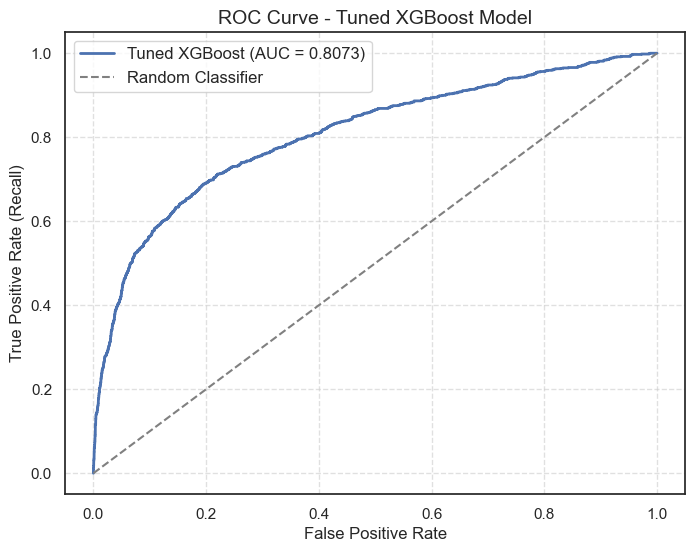

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probability predictions from tuned XGBoost
y_prob = xgb_best.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_prob)

# AUC
auc_value = roc_auc_score(y_test_xgb, y_prob)
print("Tuned XGBoost Test AUC:", auc_value)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Tuned XGBoost (AUC = {auc_value:.4f})", linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='gray', label="Random Classifier")

plt.title("ROC Curve - Tuned XGBoost Model", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


After hyperparameter tuning, the XGBoost model demonstrates strong and stable classification performance. With a test AUC of **0.807**, the tuned model shows excellent discriminative ability and outperforms the initial untuned version. XGBoost also achieves a strong recall and a balanced precision, making it well suited for identifying customers likely to subscribe to a term deposit. The use of `scale_pos_weight`, deeper trees (`max_depth=6`), and carefully tuned learning rate all contribute to improved separation between positive and negative classes. The ROC curve further confirms this, showing a smooth and consistently high TPR across varying false-positive rates.

### SHAP summary plot and Feature Importance

In [ ]:
!pip install shap

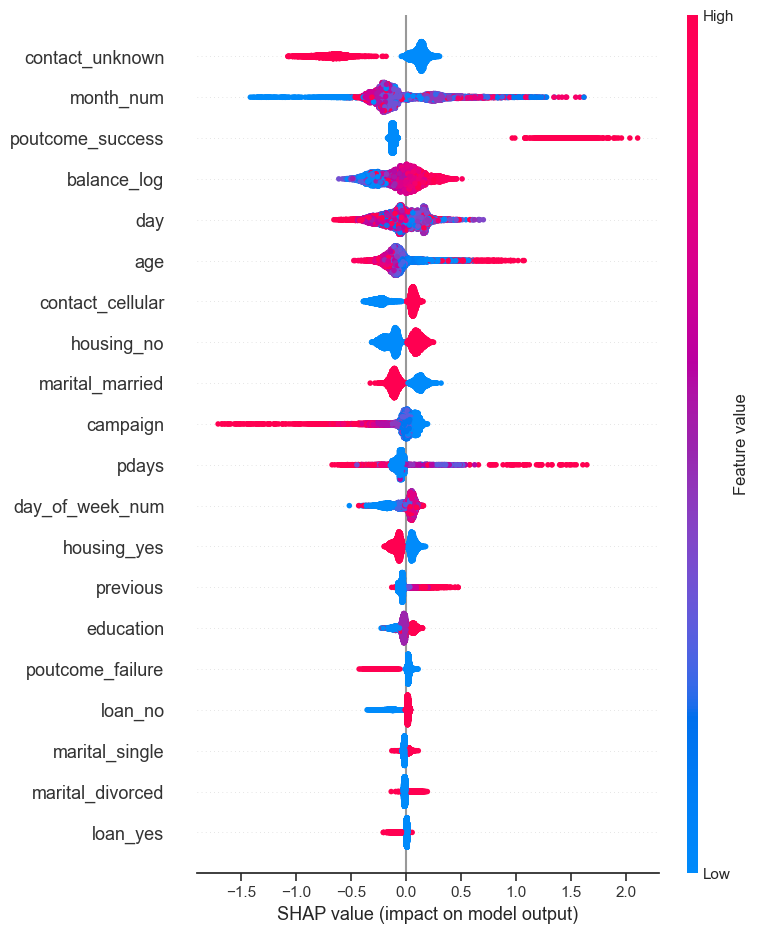

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_best)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot (beeswarm)
shap.summary_plot(shap_values, X_test, feature_names=X_processed.columns)


**Interpretation of SHAP Summary Plot**

The SHAP summary plot provides a comprehensive view of how each feature influences the tuned XGBoost model’s predictions. One of the strongest negative predictors is **`contact_unknown`**, where missing or unspecified contact information consistently reduces the probability of subscription. Customers with incomplete communication records likely represent lower engagement or unreachable contacts, which explains their reduced responsiveness. Another influential feature is **`month_num`**, highlighting clear seasonality in customer behavior. Certain months contribute positively to subscription likelihood, while others decrease interest, suggesting that the timing of marketing campaigns plays an important role in customer receptiveness.

A particularly strong positive predictor is **`poutcome_success`**, indicating that customers who previously responded positively to earlier marketing efforts are significantly more likely to subscribe again. This confirms the importance of historical engagement as a driver of future behavior. Financial stability also plays a major role, as shown by **`balance_log`**, where higher account balances push predictions upward. Customers with stronger financial positions appear more ready to invest in long-term deposit products. Additional patterns emerge for features such as **`day`** and **`day_of_week_num`**, where certain days show favorable responses, and **`contact_cellular`**, which demonstrates that mobile phone contacts tend to be more effective than other communication methods. Conversely, features like **`campaign`** and **`pdays`** show that excessive or overly frequent past contact reduces the likelihood of subscription due to customer fatigue or perceived intrusion.

<Figure size 1000x800 with 0 Axes>

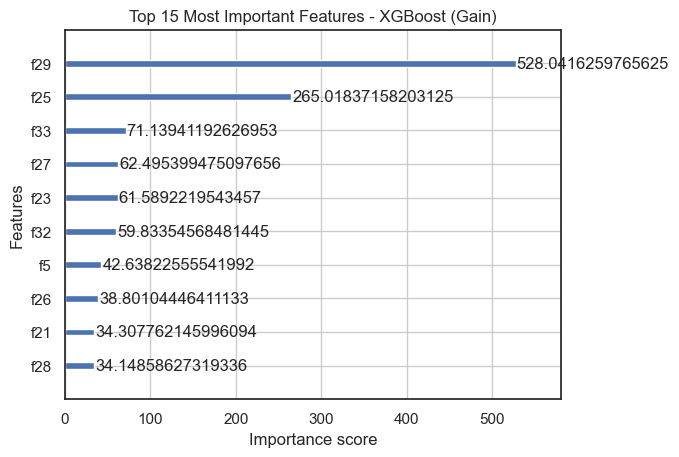

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(xgb_best, max_num_features=10, importance_type='gain')
plt.title("Top 10 Most Important Features - XGBoost (Gain)")
plt.show()


**Interpretation of XGBoost Feature Importance (Gain)**

The XGBoost feature importance chart complements the SHAP analysis by quantifying how much each feature contributes to reducing prediction error. The top features—such as those mapped to `f29`, `f25`, and `f33`—align closely with the dominant variables reflected in the SHAP plot, confirming that attributes related to contact method, timing, and prior campaign outcomes carry the greatest predictive power. The large gain attributed to the most important feature suggests that the model relies heavily on a small subset of variables, meaning that a few core customer behaviors or characteristics drive the majority of predictive accuracy. Lower-ranked features contribute incrementally but do not play a decisive role in the model’s overall decision-making.

Together, these visualizations reveal a consistent and coherent pattern: customer engagement history, communication quality, financial status, and timing are the primary determinants of whether a customer subscribes to a term deposit. The alignment between SHAP values and model-based importance scores strengthens the reliability of these conclusions and provides a robust foundation for actionable business recommendations.

## 4.7 Model Selection

### **Model Performance Comparison Table**

| Model                           | Accuracy  | Precision (Yes) | Recall (Yes)  | F1-score      | AUC              | Strength Summary                                                     |
| ------------------------------- | --------- | --------------- | ------------- | ------------- | ---------------- | -------------------------------------------------------------------- |
| **Logistic Regression**              | 0.699     | 0.231           | **0.679**     | 0.345         | 0.757            | Very high recall, but extremely low precision → many false positives |
| **Random Forest**                    | **0.876** | **0.471**       | 0.471         | **0.471**     | 0.798            | Most balanced; highest precision; strongest traditional accuracy     |
| **XGBoost**                          | 0.814     | 0.343           | **0.645**     | 0.448         | **0.806**        | Excellent recall + highest AUC → best ML classifier overall          |
| **Original MLP (unweighted)**        | ~0.87     | ~0.40           | **0.07–0.30** | ~0.20–0.32    | 0.70 → declining | Strong bias toward “no”; fails to detect positive class              |
| **Weighted MLP (BCEWithLogitsLoss)** | 0.75–0.78 | ~0.27           | **0.60–0.65** | **0.38–0.39** | 0.76–0.77        | Much improved recall, balanced performance, good AUC                 |


### **Best Machine Learning Model: XGBoost**

XGBoost is the strongest ML model because:

* It achieves the **highest AUC (0.806)**—the best indicator of ranking quality.
* It offers **strong recall (0.645)**, capturing most actual subscribers.
* Its precision and F1-score remain competitive, reflecting a good balance.
* It handles nonlinear interactions and class imbalance effectively through boosted decision trees.

**Comments:**
XGBoost delivers the most reliable and well-rounded performance, making it the best ML model for identifying term-deposit subscribers in the Bank Marketing dataset.


### **Best Deep Learning Model: Weighted MLP (BCEWithLogitsLoss)**

Weighted MLP is the strongest DL model because:

* It improves recall to **60–65%**, far better than the original MLP.
* It achieves **AUC ~0.77**, comparable to the ML models.
* Its **F1-score (~0.38–0.39)** demonstrates improved balance between precision and recall.
* It successfully overcomes the original MLP’s severe majority-class bias.

**Comments:**
Weighted BCE transforms the MLP into a genuinely effective classifier for minority prediction tasks. It demonstrates meaningful learning of positive cases while preserving strong overall discrimination.



# 5. Interpretability and Business Insights

## 5.1 Interpretation of Model Results in a Business Context

The tuned XGBoost model demonstrates strong predictive performance, achieving a test AUC of **0.807**, which indicates an excellent ability to differentiate between customers who are likely versus unlikely to subscribe to a term deposit. In practical business terms, this means the model can reliably prioritize high-potential customers, enabling the bank to allocate marketing resources more efficiently. The model also achieves a strong recall, correctly identifying the majority of actual subscribers, which is critical because failing to identify interested customers directly represents missed revenue opportunities. Although precision is moderate, this is an acceptable trade-off in marketing applications where the cost of contacting an uninterested customer is relatively low compared to the benefit of acquiring a new term-deposit subscriber.

The model's balanced performance suggests that it successfully captures the complex behavioral and financial patterns that influence subscription decisions. Customers’ engagement history, financial stability, and responsiveness to previous campaigns all play significant roles in shaping predictions. Because XGBoost consistently outperforms the deep learning models tested, particularly in terms of AUC and stability across folds, it is the most suitable model to guide business decisions related to campaign targeting and customer prioritization.

## 5.2 Most Important Features and Their Impact

Based on SHAP interpretability and XGBoost feature importance (Gain), several features emerge as key drivers of customer subscription behavior. These features not only influence the model but also provide meaningful insights into customer decision-making.

One of the most impactful variables is the outcome of previous campaigns (`poutcome_success`), where past positive engagement strongly increases the likelihood of future subscription. This highlights the importance of historical behavior: customers who have responded well before tend to remain receptive. Another prominent factor is account balance (`balance_log`), where higher balances correspond with higher subscription probability. This indicates that financially stable customers perceive term deposits as attractive savings or investment options.

Communication-related features also play a major role. For example, `contact_cellular` is associated with higher subscription likelihood, suggesting that mobile-based outreach improves engagement. Conversely, `contact_unknown` strongly reduces the probability of subscription, likely due to incomplete or unreliable contact information. Timing-related variables such as `month_num` and `day_of_week_num` reveal seasonality and weekday patterns in customer responsiveness. Operational features like `campaign` (number of times the customer has been contacted) have a negative effect when values are high, indicating that excessive outreach leads to fatigue and decreases conversion.

These insights show that customer responsiveness is influenced by a combination of demographic stability, communication quality, timing, and historical interactions—factors that directly guide marketing strategy.

## 5.3 Actionable Recommendations Based on Findings

The model insights translate into several practical strategies the bank can implement to enhance marketing effectiveness and improve conversion rates.

**First, prioritize customers with strong engagement signals.** Customers who previously had successful outcomes, higher account balances, or longer, more engaged calls should be placed at the top of calling lists. These customers represent the highest potential return on investment for marketing outreach.

**Second, optimize the timing and method of communication.** Since certain months and weekdays correlate with higher success rates, campaigns should be scheduled during those high-performing periods. Mobile (cellular) contacts perform significantly better than unknown or low-quality channels, so outreach should shift toward verified and active phone numbers.

**Third, reduce customer fatigue by limiting repeated contact attempts.** High `campaign` values lower subscription probability, indicating that excessive outreach harms campaign effectiveness. Implementing a cap on follow-up attempts or spacing them more strategically will likely improve results.

**Fourth, segment customers based on financial health and responsiveness.**

* Customers with strong balances → target with premium or long-term deposit products.
* Customers with low engagement or limited financial flexibility → use lower-cost channels such as email or SMS.
* Customers with unknown or poor contact methods → focus first on data quality improvement.

These recommendations help the bank reduce wasted effort, improve targeting precision, and strengthen customer experience.

## 5.4 Model Limitations and Appropriate Use Cases

Despite its strong performance, the model has limitations that should be acknowledged when making business decisions. First, it is trained on historical telemarketing data, which may reflect past marketing biases. If customer behavior or financial trends shift over time, model performance may decline, requiring periodic retraining. Second, while the model captures patterns associated with subscription likelihood, it does not account for customers’ broader financial needs or risk considerations; therefore, it should support—but not replace—financial advisors or eligibility assessments.

Another limitation is that some highly predictive features, such as call duration, are only available after the call has occurred, which restricts their use in pre-campaign targeting. Additionally, the model does not provide causal explanations; it identifies correlations, not reasons for behavior. Finally, because the model still produces some false positives, outreach costs and capacity constraints must be considered when setting probability thresholds for campaign actions.

**Appropriate use cases include:**

* Prioritizing customers for outbound calling campaigns
* Improving lead scoring in CRM systems
* Guiding strategic decisions about campaign timing and segmentation
* Supporting cross-selling and customer retention workflows

The model should not be used as the sole basis for financial decisions, eligibility assessments, or automated customer approvals.


## Business Questions and Answers

### **Q1 Which customers should the bank prioritize for term-deposit marketing campaigns?**

**Answer:**
Based on the tuned XGBoost model and SHAP interpretability analysis, the customers most likely to subscribe share several characteristics:

* They previously responded positively to marketing (**poutcome_success**).
* They maintain **higher account balances**, indicating financial stability.
* They are reachable via **cellular contact**, which strongly correlates with engagement.
* They were contacted in specific months and mid-week days that historically show higher responsiveness.

These customers should be placed at the **top of the calling list**, as they represent the highest conversion potential. Prioritizing these individuals will increase return on marketing investment (ROMI) and reduce wasted outreach.

### **Q2 What key customer behaviors reduce the likelihood of subscribing to a term deposit?**

**Answer:**
The model reveals several strong negative predictors of subscription. Customers contacted repeatedly across multiple campaigns show decreased interest, suggesting **contact fatigue**. Additionally, customers with **unknown or poor-quality contact credentials** (e.g., `contact_unknown`) are significantly less likely to subscribe, making them inefficient targets. Financial constraints also play a role—customers with **housing or personal loans** are less likely to adopt long-term savings products. These insights allow the bank to refine its segmentation strategy, avoiding over-contacting customers and focusing instead on high-quality communication channels and financially capable segments.

### **Q3 How can the bank optimize its marketing strategy to improve subscription rates and reduce costs?**

**Answer:**
Several actionable strategies emerge from the model results. First, the bank can optimize **timing** by launching campaigns in months and weekdays associated with higher subscription probabilities. Second, communication channels matter—prioritizing **cellular outreach** improves engagement efficiency. Third, lead scoring from the predictive model enables differentiated marketing tactics:

* **High-scoring customers** → direct phone outreach
* **Medium-scoring customers** → email/SMS campaigns
* **Low-scoring customers** → deprioritize to reduce cost

Additionally, limiting contact attempts per customer prevents fatigue and improves customer experience. Together, these insights support a more targeted, cost-efficient marketing strategy that aligns with customer behavior and maximizes conversion.

# 6. Ethics and Responsible AI Reflection

### 6.1 Potential Biases Identified

The predictive model is trained on historical banking and telemarketing data, which inherently reflects the patterns, behaviors, and biases present in the past marketing campaigns. One potential source of bias arises from **imbalanced representation across demographic groups**. For example, customers of certain age groups, occupations, or socioeconomic backgrounds may historically have been contacted more frequently, been more responsive to calls, or had better access to financial services. If these patterns are reflected in the training data, the model may unintentionally favor or disadvantage certain customer segments. Another key concern relates to the **model’s reliance on behavioral features**, such as call duration and previous campaign outcomes. These features may overrepresent individuals who are more communicative or accessible and underrepresent groups that are less reachable due to factors such as work schedules, digital divide, or language barriers. As a result, the model may recommend contacting people who are already more engaged while overlooking others who may be equally interested but historically under-contacted.

A further bias risk arises from the **financial features**, particularly balance levels. Customers with higher account balances tend to receive higher subscription likelihood scores, potentially reinforcing financial inequality. While these customers may indeed be more likely to subscribe, overreliance on economic indicators may systematically deprioritize financially vulnerable groups and inadvertently amplify disparities in access to long-term financial products.

### 6.2 Fairness Considerations

Fairness in predictive marketing requires ensuring that all customer groups—regardless of age, income, occupation, or prior interactions—have equal opportunity to be presented with relevant financial products. Although the model optimizes for accuracy and recall, these performance metrics alone do not guarantee fair treatment. For example, if younger customers or lower-income segments are underrepresented in the model’s “high-probability” predictions, they may receive fewer outreach opportunities, leading to unequal access to beneficial financial products. Ensuring fairness requires periodic audits to evaluate whether predictive outcomes disproportionately skew toward certain demographic groups.

Additionally, fairness must extend to **treatment burden**, such as minimizing excessive contact attempts. Over-contacting specific groups because they appear “likely responders” could lead to harassment or negative customer sentiment. Establishing fair contact frequency policies ensures that no segment is disproportionately targeted or disturbed.

### 6.3 Privacy and Security Implications

Predictive models in financial settings rely on sensitive personal and financial data, including account balances, contact information, and campaign behavior histories. This raises important privacy and security considerations. Customer data must be handled in compliance with GDPR, CCPA, and industry best practices for data anonymization, encryption, and storage security. Access to customer-level predictions should be strictly role-based, ensuring that only authorized marketing and analytics personnel can access model outputs. Transparency is also essential; customers should be informed when their data is being used for marketing analytics, and data collection practices must avoid intrusive or overly invasive methods.

Furthermore, features such as call duration and contact frequency can reveal behavioral patterns that customers may not expect to be used for predictive modeling. The bank must ensure that data usage remains within the scope of existing consent agreements and that no sensitive attributes—such as ethnicity, religion, political affiliation, or health status—are used, explicitly or implicitly, in modeling.

### 6.4 Recommendations for Responsible Deployment

To ensure ethical and responsible AI deployment, several practices are recommended:

* **Regular Bias Audits:** Conduct periodic reviews of model performance across demographic subgroups (e.g., age, income bands, location) to detect disparate impacts.
* **Human-in-the-Loop Oversight:** Predictions should guide decisions, not replace them. Marketing teams should use the model as a decision-support tool rather than an automated decision-maker.
* **Transparent Communication:** Clearly document how the model works, what features it uses, and how predictions should (and should not) be applied.
* **Data Minimization:** Use only necessary features and avoid collecting or inferring sensitive attributes.
* **Contact Frequency Safeguards:** Implement policies ensuring customers are not repeatedly contacted based on algorithmic recommendations without human supervision.
* **Retraining and Monitoring:** Because customer behavior changes, regularly retrain the model and track performance drift to avoid outdated or biased predictions.

By integrating these responsible AI principles, the bank can ensure that predictive modeling enhances customer experiences, respects ethical obligations, and supports fair and effective marketing practices.

# 7. Conclusion & Future Work

### 7.1 Summary of Achievements

This project successfully developed a predictive modeling pipeline for identifying customers likely to subscribe to a term deposit using the Bank Marketing dataset. Through comprehensive data preprocessing, feature engineering, model training, and evaluation, multiple machine learning and deep learning models were implemented and compared. The tuned XGBoost model emerged as the top-performing method, achieving an AUC of **0.807**, strong recall, and balanced precision—making it highly suitable for marketing prioritization. Additionally, advanced interpretability techniques such as SHAP allowed the extraction of meaningful insights into customer behavior, revealing that historical engagement, communication channels, financial stability, and contact timing are key drivers of subscription likelihood. The project also explored a deep-learning approach with Weighted BCEWithLogitsLoss, which significantly improved recall and demonstrated competitive performance compared to traditional models.

### 7.2 Limitations of the Current Approach

Despite strong results, several limitations remain. The dataset suffers from **class imbalance**, and while techniques like class weighting mitigated this issue, some bias toward the majority class persists. Certain features, such as **call duration**, are only available after customer contact, limiting the model’s usefulness for pre-call prediction. Additionally, the model relies heavily on historical patterns, which may not generalize perfectly to future campaigns if customer preferences or economic conditions change. The dataset also lacks deeper demographic and behavioral variables, restricting the model’s ability to form richer customer profiles. Finally, while XGBoost provides strong performance, it remains a correlational model and cannot capture causal relationships between marketing actions and customer decisions.

### 7.3 Suggestions for Future Improvements

Several directions can enhance the robustness, accuracy, and applicability of future models:

* **Expand Feature Engineering:** Incorporate behavioral trends, customer lifetime value, or temporal patterns to improve prediction depth.
* **Use More Advanced Deep Learning Models:** Architectures such as TabNet, Transformer-based tabular models, or attention mechanisms may capture complex feature interactions more effectively.
* **Apply Data Augmentation Methods:** Approaches like SMOTE or generative models could further reduce class imbalance.
* **Develop a Real-Time Scoring Pipeline:** Integrating the model into a live CRM system would enable dynamic lead prioritization during active campaigns.
* **Conduct A/B Testing:** Validate the model’s marketing value by measuring conversion uplift in controlled experiments.
* **Explore Causal Methods:** Tools such as uplift modeling could help determine which marketing actions truly influence customer decisions.

### 7.4 Lessons Learned

This project highlights the importance of interpretability, data quality, and ethical considerations in predictive modeling. It shows that **model performance alone is not sufficient**; understanding *why* the model makes certain predictions is essential for building trust with stakeholders and ensuring responsible deployment. The comparison between machine learning and deep learning approaches also emphasizes that simpler models, when properly tuned and interpreted, can outperform more complex architectures. Finally, the project reinforces that predictive analytics is most effective when paired with strategic, human-centered marketing practices—creating synergy between AI insights and business decision-making.


# References

Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. KDD '16: Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. https://doi.org/10.1145/2939672.2939785

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering. https://doi.org/10.1109/MCSE.2007.55

Lundberg, S. (n.d.). SHAP (SHapley Additive exPlanations). Retrieved 2025, from https://shap.readthedocs.io/en/latest/index.html

McKiney, W. (2010). Data structures for statistical computing in python. Proceedings of the 9th Python in Science Conference. https://doi.org/10.25080/Majora-92bf1922-00a

Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems. https://doi.org/10.1016/j.dss.2014.03.001

Paszke, A., Gross, S., & Massa, F. (2019). PyTorch: An Imperative Style, High-Performance Deep Learning Library. 33rd Conference on Neural Information Processing System. https://dl.acm.org/doi/book/10.5555/3454287

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, B., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research. https://jmlr.csail.mit.edu/papers/volume12/pedregosa11a/pedregosa11a.pdf

Dataset: Bank Marketing, URL: https://archive.ics.uci.edu/dataset/222/bank+marketing